import libraries

In [2]:
import pandas as pd
from pandas.core.arrays.sparse import dtype
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

import string
import re

import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import random

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = "/content/drive/My Drive/Capstone/data/depression_pre.csv"
dp = pd.read_csv(path)

path2 = "/content/drive/My Drive/Capstone/data/depression_post.csv"
dp_post = pd.read_csv(path2)

path3 = "/content/drive/My Drive/Capstone/data/anxiety_pre.csv"
anx_pre = pd.read_csv(path3)

path4 = "/content/drive/My Drive/Capstone/data/anxiety_post.csv"
anx_post = pd.read_csv(path4)

path5 = "/content/drive/My Drive/Capstone/data/adhd_pre.csv"
adhd_pre = pd.read_csv(path5)

path6 = "/content/drive/My Drive/Capstone/data/adhd_post.csv"
adhd_post = pd.read_csv(path6)

path7 = "/content/drive/My Drive/Capstone/data/bipolar_pre.csv"
bi_pre = pd.read_csv(path7)

path8 = "/content/drive/My Drive/Capstone/data/bipolar_post.csv"
bi_post = pd.read_csv(path8)

path9 = "/content/drive/My Drive/Capstone/data/ptsd_pre.csv"
pt_pre = pd.read_csv(path9)

path10 = "/content/drive/My Drive/Capstone/data/ptsd_post.csv"
pt_post = pd.read_csv(path10)

path11 = "/content/drive/My Drive/Capstone/data/schiz_pre.csv"
sc_pre = pd.read_csv(path11)

path12 = "/content/drive/My Drive/Capstone/data/schiz_post.csv"
sc_post = pd.read_csv(path12)

path13 = "/content/drive/My Drive/Capstone/data/ed_pre.csv"
ed_pre = pd.read_csv(path13)

path14 = "/content/drive/My Drive/Capstone/data/ed_post.csv"
ed_post = pd.read_csv(path14)

path15 = "/content/drive/My Drive/Capstone/data/bf_pre.csv"
bf_pre = pd.read_csv(path15)

path16 = "/content/drive/My Drive/Capstone/data/bf_post.csv"
bf_post = pd.read_csv(path16)

path17 = "/content/drive/My Drive/Capstone/data/sw_pre.csv"
sw_pre = pd.read_csv(path17)

path18 = "/content/drive/My Drive/Capstone/data/sw_post.csv"
sw_post = pd.read_csv(path18)

In [5]:
pre_txt = pd.concat([dp, anx_pre, adhd_pre, bi_pre, pt_pre, sc_pre, ed_pre, bf_pre, sw_pre])
post_txt = pd.concat([dp_post, anx_post, adhd_post, bi_post, pt_post, sc_post, ed_post, bf_post, sw_post])

In [6]:
pre_txt.sample(3)

,Unnamed: 0,Title,Post Text,ID,Score,Upvote Ratio,Total Comments,Created On,Post URL,Original Content,Saved,year,month
157,10,"From hospital me to happy me, 4 years after be...",NaN,c3eiv3,198.0,0.98,33.0,2019-06-21 18:37:05,https://imgur.com/a/DwZCD05,0.0,0.0,NaN,NaN
67,2,"I just miss the days when I’d wake up, get rig...",Just woke up and this was the first thing that...,9y6vzb,1143.0,0.99,86.0,2018-11-18 15:39:52,https://www.reddit.com/r/depression/comments/9...,False,False,2018.0,11.0
193,25,every time,NaN,as5ngz,921.0,1.00,31.0,2019-02-19 03:05:02,https://i.redd.it/fbtvy98cyfh21.jpg,False,False,NaN,NaN


post length, title length

In [7]:
pre_txt = pre_txt.drop(columns= ['Unnamed: 0' , 'ID', 'Post URL', 'Original Content', 'Saved', 'year', 'month'])
post_txt = post_txt.drop(columns= ['Unnamed: 0', 'ID','Post URL', 'Original Content', 'Saved', 'year', 'month'])

In [8]:
pre_txt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2047 entries, 0 to 201
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           2047 non-null   object 
 1   Post Text       1195 non-null   object 
 2   Score           2047 non-null   float64
 3   Upvote Ratio    2047 non-null   float64
 4   Total Comments  2047 non-null   float64
 5   Created On      2047 non-null   object 
dtypes: float64(3), object(3)
memory usage: 111.9+ KB


In [9]:
pre_txt["Post Text"].replace('[removed]', "", inplace = True)
pre_txt['Post Length'] = pre_txt['Post Text'].str.len()
post_txt["Post Text"].replace('[removed]', "", inplace = True)
post_txt['Post Length'] = post_txt['Post Text'].str.len()

In [10]:
pre_txt['Post Length']

0      621.0
1      537.0
2      826.0
3      163.0
4      331.0
       ...  
197    275.0
198     44.0
199    676.0
200      NaN
201     24.0
Name: Post Length, Length: 2047, dtype: float64

In [11]:
pre_length = pre_txt['Post Length'].index
post_length = post_txt['Post Length'].index

Text(0.5, 0, 'Pre COVID Post Length Distribution')

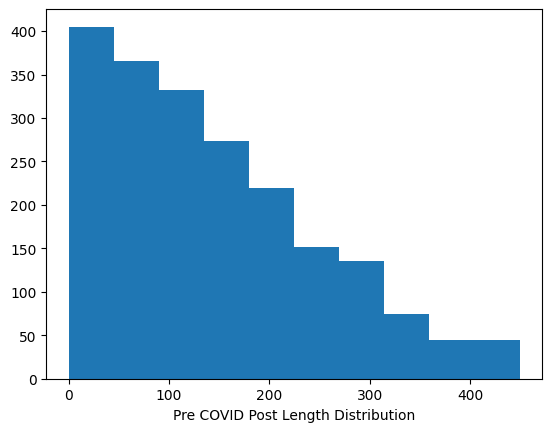

In [12]:
plt.hist(pre_length)
plt.xlabel('Pre COVID Post Length Distribution')

Text(0.5, 0, 'Post COVID Post Length Distribution')

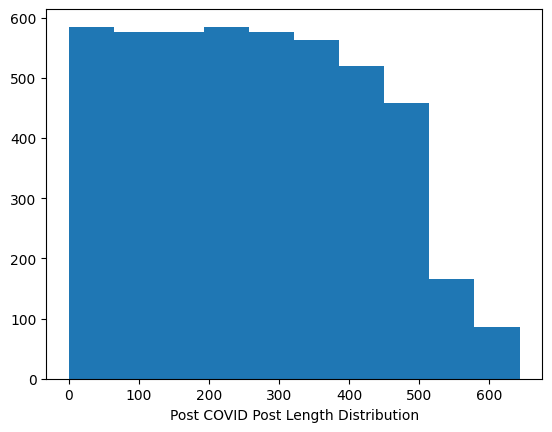

In [13]:
plt.hist(post_length)
plt.xlabel('Post COVID Post Length Distribution')

Text(0.5, 0, 'Pre COVID Total Comments Distribution')

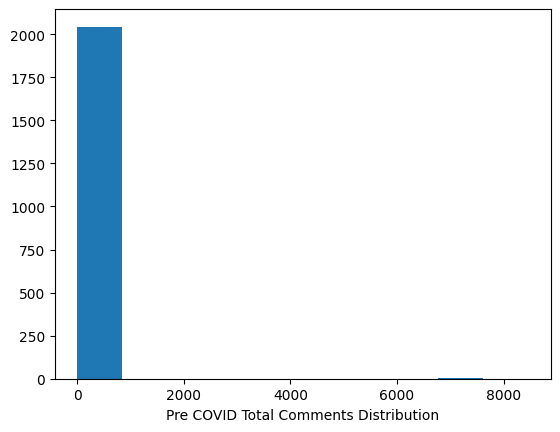

In [14]:
plt.hist(pre_txt['Total Comments'])
plt.xlabel('Pre COVID Total Comments Distribution')

Text(0.5, 0, 'Post COVID Total Comments Distribution')

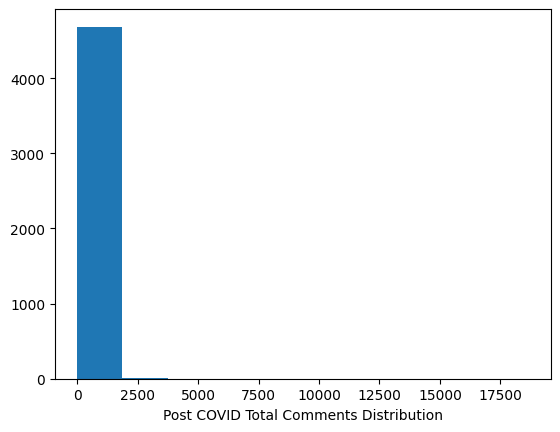

In [15]:
plt.hist(post_txt['Total Comments'])
plt.xlabel('Post COVID Total Comments Distribution')

Text(0.5, 0, 'Pre COVID Upvote Ratio Distribution')

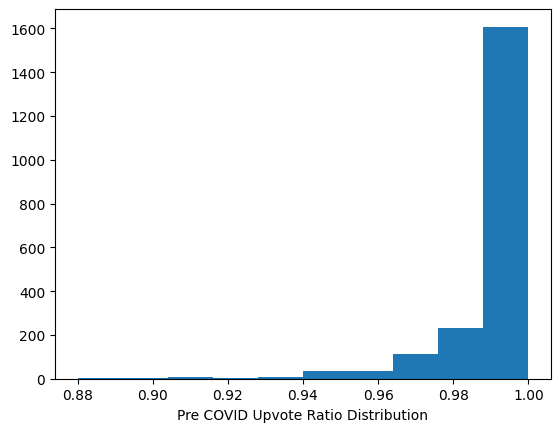

In [16]:
plt.hist(pre_txt['Upvote Ratio'])
plt.xlabel('Pre COVID Upvote Ratio Distribution')

Text(0.5, 0, 'Post COVID Upvote Ratio Distribution')

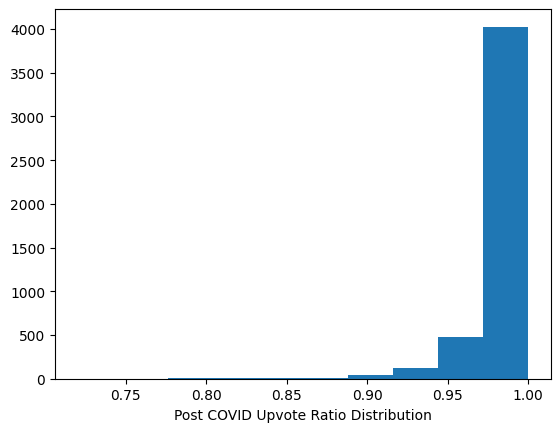

In [17]:
plt.hist(post_txt['Upvote Ratio'])
plt.xlabel('Post COVID Upvote Ratio Distribution')

Text(0.5, 0, 'Pre COVID Score Distribution')

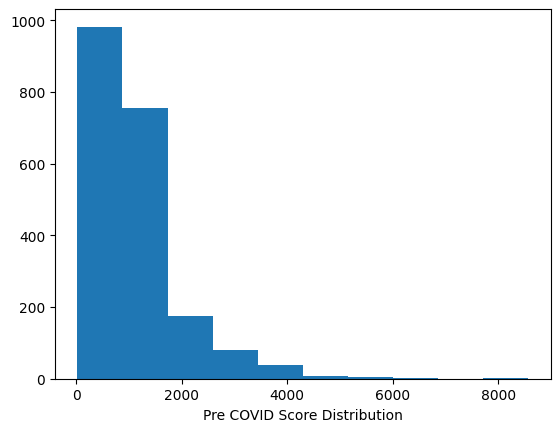

In [18]:
plt.hist(pre_txt['Score'])
plt.xlabel('Pre COVID Score Distribution')

Text(0.5, 0, 'Post COVID Score Distribution')

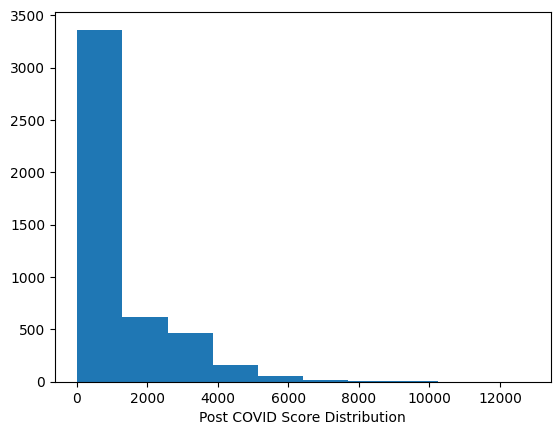

In [19]:
plt.hist(post_txt['Score'])
plt.xlabel('Post COVID Score Distribution')

text analysis

In [20]:
pre_ta = pre_txt.drop(columns=['Title', 'Score', 'Total Comments', 'Upvote Ratio','Created On', 'Post Length'])
post_ta = post_txt.drop(columns=['Title', 'Score', 'Total Comments', 'Upvote Ratio','Created On', 'Post Length'])

In [22]:
plt.figure(figsize=(10,6))
plt.bar(range(len(text)), frequencies)
plt.xticks(range(len(text)), text, rotation=45)
plt.grid(axis='y', linestyle = '--', alpha=0.7)
plt.show()

NameError: name 'text' is not defined

<Figure size 1000x600 with 0 Axes>

In [23]:
pre_txt

,Title,Post Text,Score,Upvote Ratio,Total Comments,Created On,Post Length
0,"Anyone else feel like their ""fake depressed""?","it's stupid, but i always doubt the fact i hav...",2195.0,0.99,156.0,2018-01-28 13:12:11,621.0
1,Why don't you talk to us?,My parents keep asking me this question.\nToda...,1652.0,0.99,136.0,2018-01-20 17:05:18,537.0
2,An old man killed my only way of coping with d...,- be me\n- have chronic depression and social ...,1644.0,0.98,107.0,2018-01-26 20:18:05,826.0
3,Anyone just want to take a break from life and...,"That's all I want. I wanna go to a park, lay o...",1403.0,0.99,104.0,2018-01-17 00:06:20,163.0
4,I had to fill out one of those depression test...,And I scored in the 'severe' range. This lead ...,1299.0,0.99,96.0,2018-01-08 13:05:09,331.0
...,...,...,...,...,...,...,...
197,This world is messed up.,I love this subreddit but it’s really concerni...,499.0,0.99,49.0,2019-12-12 10:29:01,275.0
198,Can someone just hug me while I cry?,"It's all too much, I lost all my motivation.",488.0,0.99,79.0,2019-12-28 09:16:12,44.0
199,Humanity is the worst race to be a part of,"We are like enslaved cows, we are born forced ...",475.0,0.95,72.0,2019-12-27 12:10:05,676.0
200,I want to kill myself. And people know. But th...,NaN,472.0,1.00,61.0,2019-12-06 23:40:42,NaN


correlations - pearsons

In [24]:
pre2 = pre_txt.drop(columns=['Created On', 'Title', 'Post Text'])
post2 = post_txt.drop(columns=['Created On', 'Title', 'Post Text'])
pre2

,Score,Upvote Ratio,Total Comments,Post Length
0,2195.0,0.99,156.0,621.0
1,1652.0,0.99,136.0,537.0
2,1644.0,0.98,107.0,826.0
3,1403.0,0.99,104.0,163.0
4,1299.0,0.99,96.0,331.0
...,...,...,...,...
197,499.0,0.99,49.0,275.0
198,488.0,0.99,79.0,44.0
199,475.0,0.95,72.0,676.0
200,472.0,1.00,61.0,NaN


In [25]:
pre2.corr(method ='pearson')

,Score,Upvote Ratio,Total Comments,Post Length
Score,1.000000,0.211440,0.183161,-0.102381
Upvote Ratio,0.211440,1.000000,0.071076,-0.114334
Total Comments,0.183161,0.071076,1.000000,0.008657
Post Length,-0.102381,-0.114334,0.008657,1.000000


In [26]:
post2.corr(method ='pearson')

,Score,Upvote Ratio,Total Comments,Post Length
Score,1.000000,0.232589,0.322027,-0.004467
Upvote Ratio,0.232589,1.000000,0.056316,-0.114489
Total Comments,0.322027,0.056316,1.000000,0.034330
Post Length,-0.004467,-0.114489,0.034330,1.000000


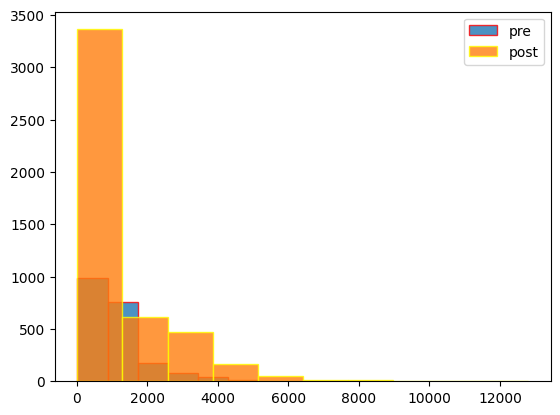

In [27]:
# plotting first histogram
plt.hist(pre2['Score'], label='pre', alpha=.8, edgecolor='red')

# plotting second histogram
plt.hist(post2['Score'], label='post', alpha=0.8, edgecolor='yellow')
plt.legend()

# Showing the plot using plt.show()
plt.show()

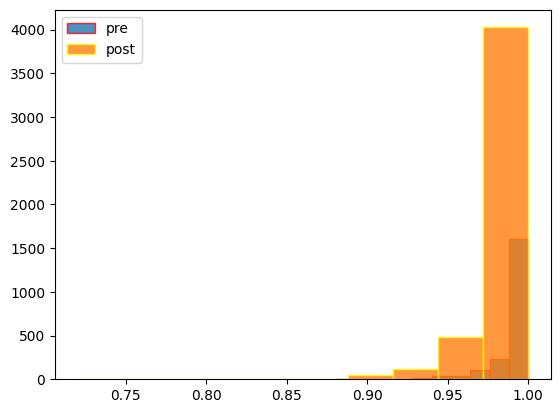

In [28]:
# plotting first histogram
plt.hist(pre2['Upvote Ratio'], label='pre', alpha=.8, edgecolor='red')

# plotting second histogram
plt.hist(post2['Upvote Ratio'], label='post', alpha=0.8, edgecolor='yellow')
plt.legend()

# Showing the plot using plt.show()
plt.show()

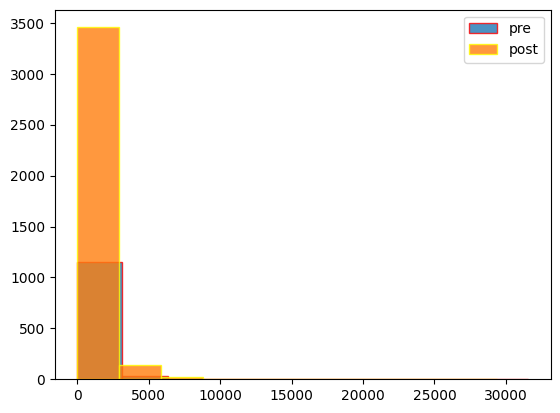

In [29]:
# plotting first histogram
plt.hist(pre2['Post Length'], label='pre', alpha=.8, edgecolor='red')

# plotting second histogram
plt.hist(post2['Post Length'], label='post', alpha=0.8, edgecolor='yellow')
plt.legend()

# Showing the plot using plt.show()
plt.show()

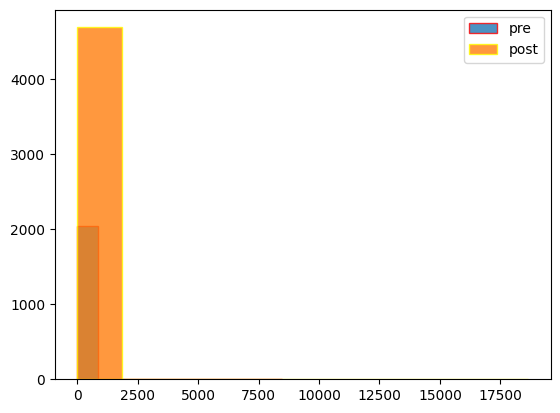

In [30]:
# plotting first histogram
plt.hist(pre2['Total Comments'], label='pre', alpha=0.8, edgecolor='red')

# plotting second histogram
plt.hist(post2['Total Comments'], label='post', alpha=0.8, edgecolor='yellow')
plt.legend()

# Showing the plot using plt.show()
plt.show()

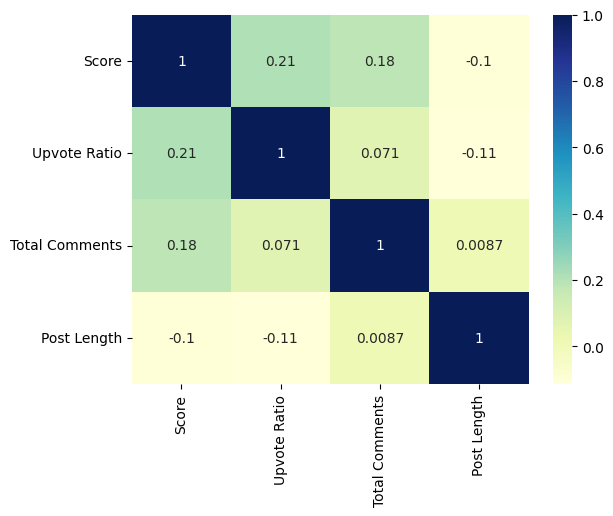

In [31]:
import matplotlib.pyplot as mp

dataplot = sns.heatmap(pre2.corr(method ='pearson'), cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()

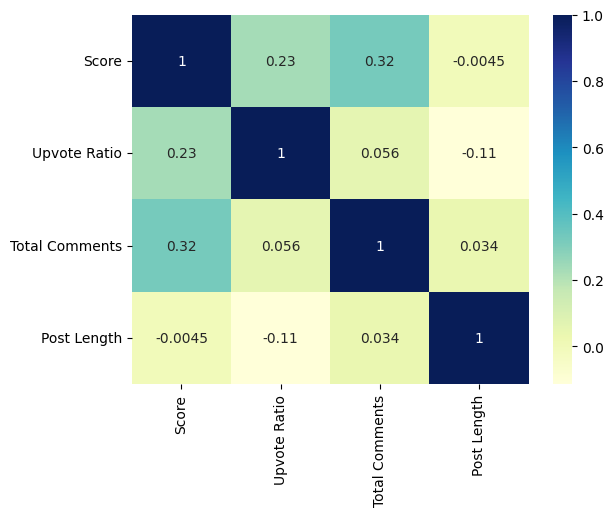

In [32]:
import matplotlib.pyplot as mp

dataplot = sns.heatmap(post2.corr(method ='pearson'), cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()

central tendency - mean, mode

In [39]:
threshold = 15000

# Filter out values greater than the threshold
df_filtered = pre2[pre2['Post Length'] <= threshold]

# Display the filtered DataFrame
print(df_filtered)

      Score  Upvote Ratio  Total Comments  Post Length
0    2195.0          0.99           156.0        621.0
1    1652.0          0.99           136.0        537.0
2    1644.0          0.98           107.0        826.0
3    1403.0          0.99           104.0        163.0
4    1299.0          0.99            96.0        331.0
..      ...           ...             ...          ...
196   515.0          0.99            50.0       5847.0
197   499.0          0.99            49.0        275.0
198   488.0          0.99            79.0         44.0
199   475.0          0.95            72.0        676.0
201   448.0          1.00            41.0         24.0

[1193 rows x 4 columns]


In [40]:
pre2.describe()

,Score,Upvote Ratio,Total Comments,Post Length
count,2047.000000,2047.000000,2047.000000,1195.000000
mean,1001.969223,0.988730,87.848559,854.890377
std,928.430462,0.013987,319.605728,1466.973368
min,19.000000,0.880000,0.000000,1.000000
25%,225.500000,0.990000,24.000000,244.000000
50%,895.000000,0.990000,53.000000,529.000000
75%,1321.000000,1.000000,101.000000,973.000000
max,8571.000000,1.000000,8465.000000,31577.000000


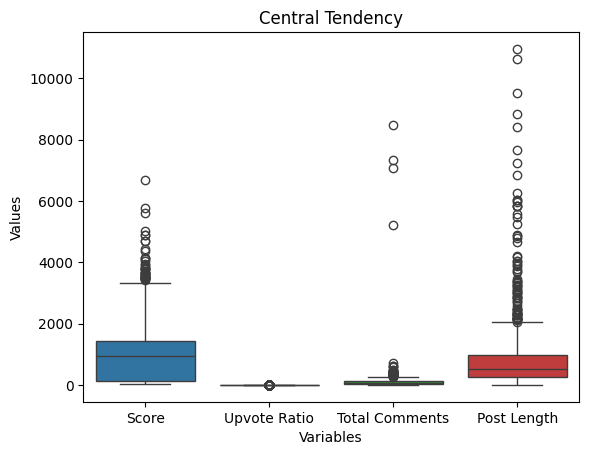

In [38]:
sns.boxplot(data = df_filtered)
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Central Tendency')
plt.show()

In [34]:
sns.boxplot(data = pre2['Score', 'Post Length'])
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Central Tendency')
plt.show()

KeyError: ('Score', 'Post Length')